# <div align='center'>第6章 判别分析与聚类分析</div>
### 内容
 <div align='left'>                  
     <font color='steelblue' size=4>
      <br> 
       6.1 判别分析<br><br>
       6.2 聚类分析<br><br>
     <font>
  </div>

------------

## 6.1 判别分析


### 6.1.1 距离判别


 #### 例1：
 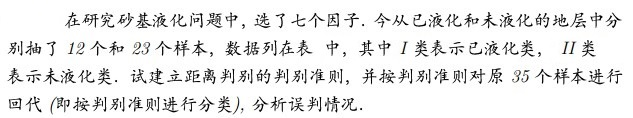
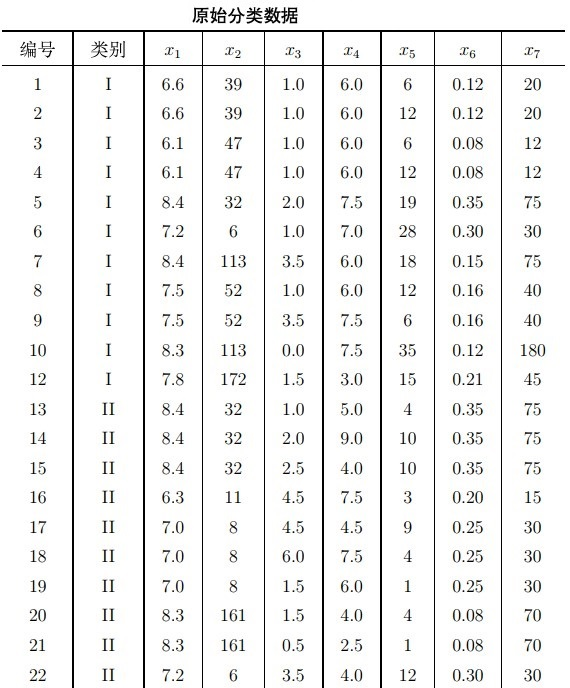
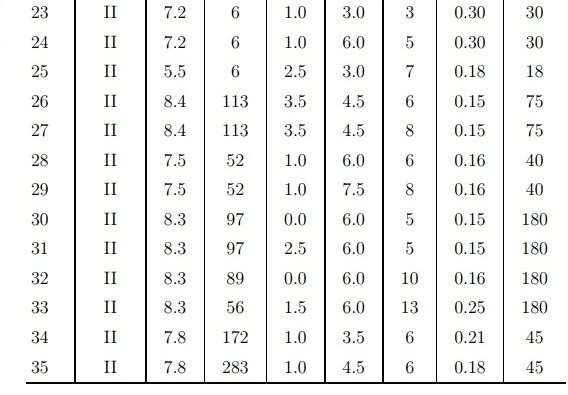

In [2]:
### 导入所需的软件包
%reset -f
import numpy as np
import pandas as pd
import scipy.stats as st

In [3]:
'''
使用马氏距离进行二分类判别分析，假设方差不相等的情况下。
'''
###样本1：已液化砂层，12个样本
classX1 = np.array([[6.60,  6.60,  6.10,  6.10,  8.40,  7.2,   8.40,  7.50, 7.50,  8.30,  7.80,  7.80],
                    [39.00, 39.00, 47.00, 47.00, 32.00,  6.0, 113.00, 52.00,52.00,113.00,172.00,172.00],
                    [1.00,  1.00,  1.00,  1.00,  2.00,  1.0,   3.50,  1.00,3.50,  0.00,  1.00,  1.50],
                    [6.00,  6.00,  6.00,  6.00,  7.50,  7.0,   6.00,  6.00,7.50,  7.50,  3.50,  3.00],
                    [6.00, 12.00,  6.00, 12.00, 19.00, 28.0,  18.00, 12.00, 6.00, 35.00, 14.00, 15.00],
                    [.12,  0.12,  0.08,  0.08,  0.35,  0.3,   0.15,  0.16, 0.16,  0.12,  0.21,  0.21],
                    [20.00, 20.00, 12.00, 12.00, 75.00, 30.0,  75.00, 40.00,40.00,180.00, 45.00, 45.00]])
###样本2:未液化砂层，23个样本
classX2 = np.array([[8.40,  8.40,  8.40,  6.3, 7.00,  7.00,  7.00,  8.30,8.30,   7.2,   7.2,  7.2, 5.50,
                     8.40,  8.40,  7.50,7.50,  8.30,  8.30, 8.30, 8.30,  7.80,  7.80],
                    [32.0 ,32.00, 32.00, 11.0, 8.00,  8.00,  8.00, 161.00, 161.0, 6.0, 6.0,  6.0, 6.00,
                     113.00,113.00,  52.00, 52.00, 97.00, 97.00,89.00,56.00,172.00,283.00],
                    [1.00,  2.00,  2.50,  4.5, 4.50,  6.00,  1.50,  1.50, 0.50,   3.5,   1.0,  1.0, 2.50, 
                     3.50,  3.50,  1.00,1.00,  0.00,  2.50, 0.00, 1.50,  1.00,  1.00],
                    [5.00,  9.00,  4.00,  7.5, 4.50,  7.50,  6.00,  4.00, 2.50,   4.0,   3.0,  6.0, 3.00, 
                     4.50,  4.50,  6.00,7.50,  6.00,  6.00, 6.00, 6.00,  3.50,  4.50],
                    [4.00, 10.00, 10.00,  3.0, 9.00,  4.00,  1.00,  4.00, 1.00,  12.0,   3.0,  5.0, 7.00, 
                     6.00,  8.00,  6.00,8.00,  5.00,  5.00,10.00,13.00,  6.00,  6.00],
                    [0.35,  0.35,  0.35,  0.2, 0.25,  0.25,  0.25,  0.08, 0.08,  0.30,   0.3,  0.3, 0.18,
                     0.15,  0.15,  0.16, 0.16,  0.15,  0.15, 0.16, 0.25,  0.21,  0.18],
                    [75.00, 75.00, 75.00,  15.0, 30.00, 30.00, 30.00, 70.00, 70.00,  30.0,  30.0,  30.0, 
                     18.00, 75.00, 75.00, 40.00, 40.00,180.00,180.00,180.00,180.00, 45.00, 45.00]])
###样本1和2的样本方差/协方差矩阵
#按照行向量计算协方差矩阵
S1 = np.cov(classX1)
S2 = np.cov(classX2)
l1= classX1.shape[1]
l2= classX2.shape[1]
###样本1和2的均值
mu1 = np.mean(classX1,axis=1)
mu2 = np.mean(classX2,axis=1)

###样本1和2各自以及和对方之间的马氏距离计算
d1_2 = np.diag(((classX1 - np.matrix(mu2).T).T)@np.linalg.inv(S2)@
               (classX1 - np.matrix(mu2).T))
#样本1到1之间的马氏距离
d1_1 = np.diag(((classX1 - np.matrix(mu1).T).T)@np.linalg.inv(S1)@
               (classX1 - np.matrix(mu1).T))
#样本2到2之间的马氏距离
d2_2 = np.diag(((classX2 - np.matrix(mu2).T).T)@np.linalg.inv(S2)@
               (classX2 - np.matrix(mu2).T))
#样本2到1之间的马氏距离
d2_1 = np.diag(((classX2 - np.matrix(mu1).T).T)@np.linalg.inv(S1)@
               (classX2 - np.matrix(mu1).T))

###根据判别函数的定义如果两两相比，距离小的那个类是数据所属类
#根据判别函数，样本1的数据判别为类型1的结果为
result1 = d1_1<d1_2
result1_1 = np.zeros(l1,dtype=int)
result1_1[np.where(result1)] = 1
result1_1[np.where(result1!=True)] = 2
print('样本1判别为类型1的结果为：',result1_1)#结果显示第9个样本判别错误
#根据判别函数，样本2的数据判别为类型1的结果为
result2 = d2_2<d2_1 
result2_1 = np.zeros(l2,dtype=int)
result2_1[np.where(result2)] = 2
result2_1[np.where(result2!=True)] = 1
#结果显示样本2的类型判别全部正确
print('样本2判别为类型2的结果为：',result2_1)

样本1判别为类型1的结果为： [1 1 1 1 1 1 1 1 2 1 1 1]
样本2判别为类型2的结果为： [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [4]:
'''
  距离判别在多分类任务的应用。
  机器学习的经典数据集鸢尾花，根据花萼和花瓣的长度与宽度四种属性，对鸢尾花分类。
  共有3类鸢尾花。
'''
import pandas as pd
iris_fromfile = pd.read_csv('e:\\data\\iris.csv', skiprows=1,
                        names=['Sepal.Length','Sepal.Width','Petal.Length',
                               'Petal.Width','Species'])

###生成类型因子，1表示setosa；2表示versicolor；3表示virginica
iris_factors = np.repeat([1,2,3],[50,50,50]) #1、2、3各重复50次，对应相应鸢尾花的类型
irisArray = np.array(iris_fromfile) #转换成数组类型，便于处理
iris = np.array(irisArray[:,0:-1],dtype=float) #取出前4列，排除第5列鸢尾花类名
iris_fromfile

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
'''
马氏距离计算的函数
'''
def mahalanobis(data,mu,var):
    dist = np.diag(((data - np.matrix(mu).T).T)@
                   np.linalg.inv(var)@(data - np.matrix(mu).T))
    return dist   

In [6]:
###计算iris鸢尾花数据集的马氏距离
m = np.mean(iris,axis=0)#向量均值，即每个观测变量的均值
cov1 = np.cov(iris.T) #观测变量之间的协方差
result = mahalanobis(iris.T,m,cov1) 
##显示前20个数据，总共是150个
result[0:20,]

array([2.13446792, 2.84911869, 2.08133866, 2.45238163, 2.46215453,
       3.88341767, 2.86210813, 1.83330032, 3.38407311, 2.37521789,
       3.28310687, 2.77479751, 2.61329752, 3.60343235, 8.73751836,
       9.71278989, 5.76058768, 2.32138944, 4.49968993, 3.43886583])

In [7]:
###多分类距离判别，距离最小的因子即判别为数据的类型。
def distinguishDistance(train,factor,test=None,vequal=False):
    #如果没有另外指定测试数据，就直接使用训练数据作为测试数据
    if test is None:
        test = train
    
    #类型个数
    f_n = len(np.unique(factor))
    
    #train.shape[1]：属性数；生成的形状是(类型数，属性数)
    mu = np.zeros((f_n,train.shape[1]))
    
    #列合并数据和类型因子
    trainWithFactors = np.c_[train,factor]
    #求每种类型的鸢尾花每个属性的均值（各自）
    for i in np.arange(0,f_n):
        j = i+1
        #特别要注意axis参数，0：表示纵向，即每列的均值；1：表示横向，求每行的均值
        mu[i,] = np.mean(train[np.where(trainWithFactors[:,4]==j)],axis=0)
    #数据条数，如果没有输入测试数据，回代训练数据
    rows_test = test.shape[0]
    #生成判别类型的保存变量
    ftype = np.zeros(rows_test)
    
    #形状：(类型数,测试数据条数)，此处是(3,150)
    #保存所有测试数据与各类型之间的距离
    D = np.zeros((f_n,rows_test))
    
    #方差相等的情况
    if vequal==True:
        #计算全部数据的协方差（即不分类型），注意要将数据转置成行向量
        cov_train = np.cov(train.T)
        #计算数据与各类型之间的马氏距离，本例中该结果的shape应为(3,150)
        for i in np.arange(0,f_n):
            D[i,:] = mahalanobis(test.T,mu[i,],cov_train)
    else:
        for i in np.arange(0,f_n):
            j = i+1
            #按照不同类别，计算各自类别数据的协方差
            covByFactor = np.cov(train[np.where(trainWithFactors[:,4]==j)].T)
            D[i,:] = mahalanobis(test.T,mu[i,],covByFactor)
    
    #比如本例mahalanobis函数返回的是一个(3,150)的数组
    for j in np.arange(0,rows_test):
        dmin=float('Inf')
        for i in np.arange(0,f_n):
            if D[i,j] < dmin:
                dmin = D[i,j]
                ftype[j] = i+1
    return ftype                

In [8]:
###训练数据回代，然后对比，验证准确率。假设协方差相等的情况下误判较多
f = distinguishDistance(iris,iris_factors,vequal=True)
missort = np.where(f != iris_factors)[0]
accuracy =1 - len(missort)/len(iris_factors)
print('假设方差相同的情况下，回代分类准确率为:',np.round(accuracy,2),'\n误判数据：',missort)

###训练数据进行回代，然后进行对比，验证准确率。假设协方差不相同的情况下：
#判别的准确率高出不少。
f = distinguishDistance(iris,iris_factors)
missort = np.where(f != iris_factors)[0]
accuracy =1 - len(missort)/len(iris_factors)
print('\n假设方差不相同的情况下，回代分类准确率为:',accuracy,'\n误判数据：',missort)

假设方差相同的情况下，回代分类准确率为: 0.87 
误判数据： [ 41  51  56  61  66  70  77  84  85 103 106 107 108 119 122 129 130 133
 134 146]

假设方差不相同的情况下，回代分类准确率为: 0.98 
误判数据： [70 72 83]


In [9]:
np.where(f != iris_factors)

(array([70, 72, 83], dtype=int64),)

### 6.1.2 贝叶斯判别
#### (1) 两个总体二分类的贝叶斯判别


In [10]:
'''
两总体的贝叶斯判别分析函数
'''
#rate = p2/p1,即第2个样本的数量除以第1个样本的数量
def discrimBayes(train1,train2,rate=1,test=None,vequal=False):
    #如果测试数据为空，将训练数据回代
    if test==None:
        test = np.vstack((train1,train2))
    #数据条数
    rows_test = test.shape[0]
    #分类结果保存
    ftype = np.zeros(rows_test)
    #第1、2个样本的均值
    mu1 = np.mean(train1,axis=0)
    mu2 = np.mean(train2,axis=0)
    #如果协方差矩阵相等
    if vequal == True:
        cov_train =  np.cov(np.vstack((train1,train2)).T)
        #这里beta的公式乘以2是因为了和距离函数中W(x)中的1/2抵消
        beta = 2*np.log(rate)
        #马氏距离计算出来之后无需乘以1/2，因为前面的beta已经乘以2，
        #二者在一个量级，不影响大小的比较
        d = mahalanobis(test.T,mu2,cov_train) - mahalanobis(test.T,mu1,cov_train)
    else:
        cov1 = np.cov(train1.T)
        cov2 = np.cov(train2.T)
        
        #计算两个样本数据的协方差行列式
        #在线性代数里，行列式的几何意义表示的二维矩阵的张成面积，三维就是张成体积
        #因此会使用协方差的行列式之比，能很好比较二者大小。
        #注意协方差的比值没有乘以1/2
        beta = 2*np.log(rate)+np.log(np.linalg.det(cov1)/np.linalg.det(cov2))
        d = mahalanobis(test.T,mu2,cov2) - mahalanobis(test.T,mu1,cov1)
    #判别类型
    for i in np.arange(0,rows_test):
        if d[i] > beta:
            ftype[i] = 1
        else:
            ftype[i] = 2
    return ftype

In [11]:
'''
使用例1：砂基液化的数据
'''
train1 = classX1.T
train2 = classX2.T
rows1 = train1.shape[0]
rows2 = train2.shape[0]
factors = np.repeat([1,2],[12,23])

#方差不相等的情况下判别全对。假设方差相等时，判别准确率差强人意
f = discrimBayes(train1,train2,rows2/rows1,vequal=False)
accuracy = len(np.where(factors == f)[0])/len(factors)
print('贝叶斯判别的准确率为(协方差不相等)：',np.round(accuracy,2))

f1 = discrimBayes(train1,train2,rows2/rows1,vequal=True)
accuracy1 = len(np.where(factors == f1)[0])/len(factors)
print('贝叶斯判别的准确率为(协方差相等)：',np.round(accuracy1,2))

贝叶斯判别的准确率为(协方差不相等)： 1.0
贝叶斯判别的准确率为(协方差相等)： 0.83


#### 例2：
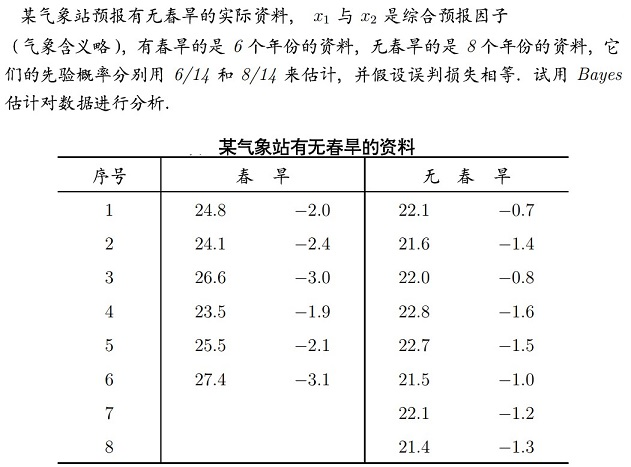

In [12]:
###本例中，协方差不相同时，判别全对；相同时，第4个数据误判
TrnX1=np.array([[24.8, 24.1, 26.6, 23.5, 25.5, 27.4],
               [-2.0, -2.4, -3.0, -1.9, -2.1, -3.1]]).T
  
TrnX2=np.array([[22.1, 21.6, 22.0, 22.8, 22.7, 21.5, 22.1, 21.4],
               [-0.7, -1.4, -0.8, -1.6, -1.5, -1.0, -1.2, -1.3]]).T
rows1 = TrnX1.shape[0]
rows2 = TrnX2.shape[0]
factors = np.repeat([1,2],[rows1,rows2])

###假定协方差相同
f = discrimBayes(TrnX1,TrnX2,rows2/rows1,vequal=True)
accuracy = len(np.where(factors == f)[0])/len(factors)
print('贝叶斯判别的准确率为(协方差相同)：',np.round(accuracy,2))
print('判别类型：',f)

###假定协方差不同
f1 = discrimBayes(TrnX1,TrnX2,rows2/rows1,vequal=False)
accuracy1 = len(np.where(factors == f1)[0])/len(factors)
print('\n贝叶斯判别的准确率为(协方差不同)：',np.round(accuracy1,2))
print('判别类型：',f1)

贝叶斯判别的准确率为(协方差相同)： 0.93
判别类型： [1. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.]

贝叶斯判别的准确率为(协方差不同)： 1.0
判别类型： [1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.]


--------

 #### (2) 多分类问题的贝叶斯判别



In [13]:
'''
贝叶斯判别在多分类中的应用。
'''
def distinguishBayes(train,factor,p=None,test=None,vequal=False):
    #注意train是列向量
    #如果test为空，则直接使用训练数据
    if test is None:
        test = train
    
    if p == None:
        p=np.repeat(1,len(np.unique(factor)))
    
    #类型数
    f_n = len(np.unique(factor))
    #用来保存均值的多维数组，(类型数,样本数据数)，本例中是(3,150)
    mu = np.zeros((f_n,train.shape[1]))
    #将训练数据和类型因子关联起来
    trainWithFactors = np.c_[train,factor]
    
    #获取每种类型的数据各属性的均值
    #本例中有3个种类，4个属性
    #每行就是某个种类的4个属性的均值
    for i in np.arange(0,f_n):
        j = i+1
        mu[i,] = np.mean(train[np.where(trainWithFactors[:,4]==j)],axis=0)
    
    #注意传入函数的训练数据是列向量，rows_test是训练数据的条数（也是行数）
    rows_test = test.shape[0]
    #保存每条数据的类型
    ftype = np.zeros(rows_test)
    #距离：每条数据和每个类型距离都要保存，本例D.shape=(3,150)
    D = np.zeros((f_n,rows_test))
    
    #协方差矩阵相同
    if vequal==True:
        cov_train = np.cov(train.T)
        for i in np.arange(0,f_n):
            d = mahalanobis(test.T,mu[i,],cov_train)
            
            ###判别函数
            
            D[i,:] = d - 2*np.log(p[i])
    else:##协方差矩阵不相同
        #每次循环计算训练数据(150条)和1个类型的距离，循环次数等于类型个数
        for i in np.arange(0,f_n):
            j = i+1            
            ###分别计算3个类型训练数据的协方差矩阵
            #注意要将矩阵转置成行向量，才能计算4个属性的协方差矩阵
            covByFactor = np.cov(train[np.where(trainWithFactors[:,4]==j)].T)
            #计算数据和某个类型的距离
            d = mahalanobis(test.T,mu[i,],covByFactor)    
            D[i,:] = d - 2*np.log(p[i]) - np.log(np.linalg.det(covByFactor))
    
    ###根据判别准则进行判别
    
    for j in np.arange(0,rows_test):
        dmin=float('Inf')
        #每列迭代比较，最小距离所在行索引+1即该条数据的判别类型
        for i in np.arange(0,f_n):
            if D[i,j] < dmin:
                dmin = D[i,j]
                ftype[j] = i+1
    return ftype                

In [14]:
###使用鸢尾花数据
f = distinguishBayes(iris,iris_factors)
missort = np.where(f != iris_factors)[0]
accuracy =1 - len(missort)/len(iris_factors)
print('贝叶斯判别准确率(假设样本方差不同):',np.round(accuracy,4),'\n误判数据：',missort)

贝叶斯判别准确率(假设样本方差不同): 0.9667 
误判数据： [68 70 72 77 83]


### 6.1.3 Fisher判别


In [15]:
'''
Fisher判别
二分类
'''
def discrimFisher(train1,train2,test=None):
    if test==None:
        test = np.vstack((train1,train2))
    nrowsTest = test.shape[0]
    nrow1 = train1.shape[0]
    nrow2 = train2.shape[0]
    ftype = np.zeros(nrowsTest)   
    
    #第1、2样本数据的均值
    mu1 = np.mean(train1,axis=0)
    mu2 = np.mean(train2,axis=0)
    
    ###S是2个样本协方差矩阵之和，作为类内偏差之和
    S = (nrow1-1)*np.cov(train1.T) + (nrow2-1)*np.cov(train2.T)
    #下述例子是使用方差向量作为S统计量的值
    #S = (nrow1-1)*st.tvar(train1) + (nrow2-1)*st.tvar(train2)
    
    
    ###2个样本数据均值的调和均值
    mu = (nrow1/(nrow1+nrow2))*mu1 + (nrow2/(nrow1+nrow2))*mu2
    
    
    wx=np.array(mu2-mu1)@np.linalg.inv(S)@(test - mu).T
    ###下述代码是使用方差向量作为S的值计算判别函数。
    #判别精度都为94%，但是其中错判的数据有一个不同，为[7,28]
    #wx=np.array(mu2-mu1)@np.diag(S**(-1))@(test - mu).T
    
    ###根据判别准则计算类别
    for i in np.arange(0,nrowsTest):
        if wx[i]<=0:
            ftype[i] = 1
        else:
            ftype[i] = 2
    return ftype

In [16]:
#使用砂基液化的数据
train1 = classX1.T
train2 = classX2.T
f = discrimFisher(train1,train2)
factors = np.repeat([1,2],[12,23])
missort = np.where(f!=factors)[0]
accuracy = len(np.where(factors == f)[0])/len(factors)
print('Fisher判别的准确率为：',np.round(accuracy,2),'\n误判数据：',missort)

Fisher判别的准确率为： 0.94 
误判数据： [27 28]


In [17]:
###Numpy的广播机制
a=np.arange(1,13).reshape(3,4)
b=np.array([1,2,3,4])
c=np.array([[1,2,3]]).T
print('a:\n',a)
print('\nb:\n',b)
print('\nc:\n',c)
print('\na-b:\n',a-b)
print('\na-c:\n',a-c)

a:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

b:
 [1 2 3 4]

c:
 [[1]
 [2]
 [3]]

a-b:
 [[0 0 0 0]
 [4 4 4 4]
 [8 8 8 8]]

a-c:
 [[0 1 2 3]
 [3 4 5 6]
 [6 7 8 9]]


In [18]:
import numpy as np
a=np.array([1,2,3,4,5,6,7,8,9,10])
np.where(a>3)

(array([3, 4, 5, 6, 7, 8, 9], dtype=int64),)

### 6.1.4 线性判别与二次判别分析
英语：Linear & Quadratic Discriminant Analysis,LDA&QDA


In [19]:
'''
LDA&QDA，线性&二次判别分析函数
'''
def lqda(train,factor,test=None,linear=True):
    #注意train是列向量
    #如果test为空，则直接使用训练数据
    if test is None:
        test = train
    
    #类型数
    f_n = len(np.unique(factor))
    #用来保存均值的多位数组，(类型数,样本数据数)，本例中是(3,150)
    mu = np.zeros((f_n,train.shape[1]))
    #将训练数据和类型因子关联起来
    trainWithFactors = np.c_[train,factor]
    
    ###训练集的样本量，此处为150
    n=train.shape[0]
    ###计算训练数据的先验概率
    pi=np.zeros((f_n,))
    i=0
    for f in np.unique(factor):
        #取出每个类型数据的条数
        ni=np.sum(trainWithFactors[:,4]==f)
        #用每类型数据的条数/总数据量，即为先验概率
        pi[i]=ni/n
        i=i+1
                  
    
    #获取每种类型的数据各属性的均值
    
    for i in np.arange(0,f_n):
        j = i+1
        mu[i,] = np.mean(train[np.where(trainWithFactors[:,4]==j)],axis=0)
    
    #注意传入函数的训练与测试数据是列向量，rows_test是测试数据的条数（也是行数）    
    rows_test = test.shape[0]
    #保存每条数据的类型
    ftype = np.zeros(rows_test)
    #Delta判别函数的值：每条数据和每个类型Delta都要保存，本例D.shape=(3,150)
    #Delta最大的那个行索引即判定类。
    D = np.zeros((f_n,rows_test))
    
    #lda,线性判别
    if linear==True:
        ###注意计算协方差矩阵使用训练数据
        cov_train = np.cov(train.T)
        for i in np.arange(0,f_n):
            ###判别函数，计算测试数据的判别函数，注意一定要将mu[i,]转换成矩阵
            
            D[i,:] = test@np.linalg.inv(cov_train)@mu[i,] \
                     - 1/2*mu[i,]@np.linalg.inv(cov_train)@mu[i,] \
                     + np.log(pi[i])
            
    ##qda,二次判别使用各自类型的协方差矩阵进行参数估计        
    else:
        #每次循环计算训练数据(150条)和1个类型的距离，循环次数等于类型个数
        for i in np.arange(0,f_n):
            j = i+1            
            ###分别计算每个类型训练数据的协方差矩阵
            #注意要将矩阵转置成行向量，才能计算每个属性的协方差矩阵
            covByFactor = np.cov(train[np.where(trainWithFactors[:,4]==j)].T)
            
            D[i,:]=-(1/2)*mahalanobis(test.T,mu[i,],covByFactor) \
                   -(1/2)*np.log(np.linalg.det(covByFactor)) \
                   +np.log(pi[i]) 
                        
    '''
    根据判别准则进行判别。    
    '''
    for j in np.arange(0,rows_test):
        dmax=float('-Inf')
        #每列迭代比较，最小距离所在列索引+1即该条数据的判别类型
        for i in np.arange(0,f_n):
            if D[i,j] > dmax:
                dmax = D[i,j]
                ftype[j] = i+1
    return ftype                

In [20]:
np.arange(1,4)

array([1, 2, 3])

In [21]:
'''
使用lqda函数，linear设为False，即二次判别分析。
准确率较高，和R语言的qda函数计算的结果一致。
'''
f = lqda(iris,iris_factors,linear=False)
missort = np.where(f != iris_factors)[0]
accuracy =1 - len(missort)/len(iris_factors)
print('二次判别分析的准确率:',np.round(accuracy,4),'\n误判数据：',missort)

二次判别分析的准确率: 0.98 
误判数据： [ 70  83 133]


In [22]:
'''
设为lqda函数的参数linear=True即为线性判别分析。
判别结果与二次判别相同，说明判别边界为线性。
'''
f1 = lqda(iris,iris_factors,linear=True)
missort1 = np.where(f != iris_factors)[0]
accuracy1 =1 - len(missort1)/len(iris_factors)
print('线性判别准确率:',np.round(accuracy1,4),'\n误判数据：',missort1)

线性判别准确率: 0.98 
误判数据： [ 70  83 133]


In [23]:
###numpy的array与matrix数据不同计算方式
#数组类型
a=np.array([[1,2,3],[4,5,6]])
b=np.array([[7,8,9],[11,12,13]])
#矩阵类型
c=np.matrix([[1,2,3],[4,5,6]])
d=np.matrix([[7,8,9],[11,12,13]]).T
#广播机制
e=np.array([9,10,11])
f=np.array([[10],[11]])
print(a*b,'\n')
print(c*d,'\n')
print(a*e,'\n')
print(a*f,'\n')
print(a*d)

[[ 7 16 27]
 [44 60 78]] 

[[ 50  74]
 [122 182]] 

[[ 9 20 33]
 [36 50 66]] 

[[10 20 30]
 [44 55 66]] 

[[ 50  74]
 [122 182]]


-----------

### 6.2 聚类分析
#### 英文名：cluster analysis
-  事先不知道类别个数与结构
-   通过数据的对象之间的距离远近度量相似性


### 6.2.1 距离度量

### 6.2.2 系统聚类法
包括最短距离法、最长距离法、中间距离法（又称Mcquity相似法）、类平均法、重心法、离差平方和法（Ward方法）等各种方法。此处不作详细介绍。

In [24]:
'''
使用各种距离计算方法对数据进行聚类分析。
'''
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import scipy.cluster as sc
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
ytdist = np.array([662., 877., 255., 412., 996., 295., 468., 
                   268.,400., 754., 564., 138., 219., 869., 669.])
###6种系统聚类法
clustMethods = ['single','complete','median','centroid','ward','average']
ax= plt.subplots(2,3,figsize=(12,8))

i = 230
for method in clustMethods:
    i = i+1
    plt.subplot(i)
    Z = hierarchy.linkage(ytdist, method)
    d1 = hierarchy.dendrogram(Z)
plt.show()

<Figure size 1200x800 with 6 Axes>

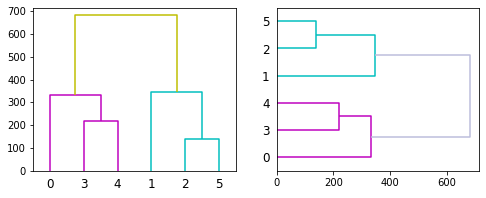

In [25]:
###还可以改变谱系图的轴方向
Z = hierarchy.linkage(ytdist, method)
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
dn1 = hierarchy.dendrogram(Z, ax=axes[0], above_threshold_color='y',orientation='top')
dn2 = hierarchy.dendrogram(Z, ax=axes[1], above_threshold_color='#bcbddc',orientation='right')
#hierarchy.set_link_color_palette(None)  # 重置功能
plt.show()

#### 示例：
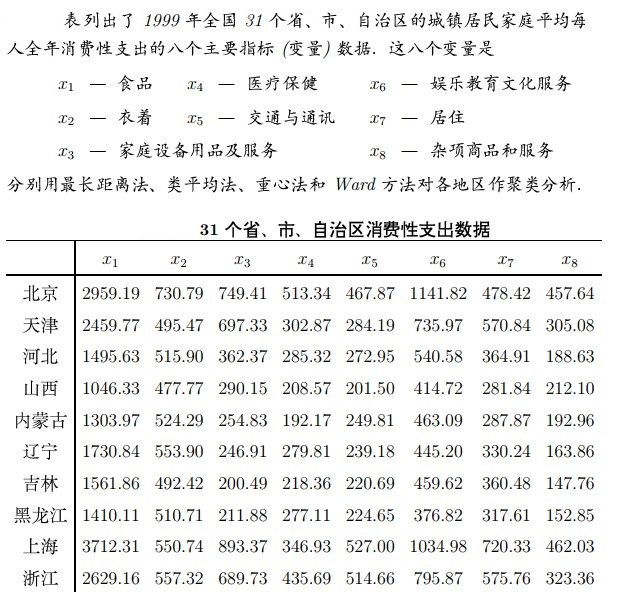
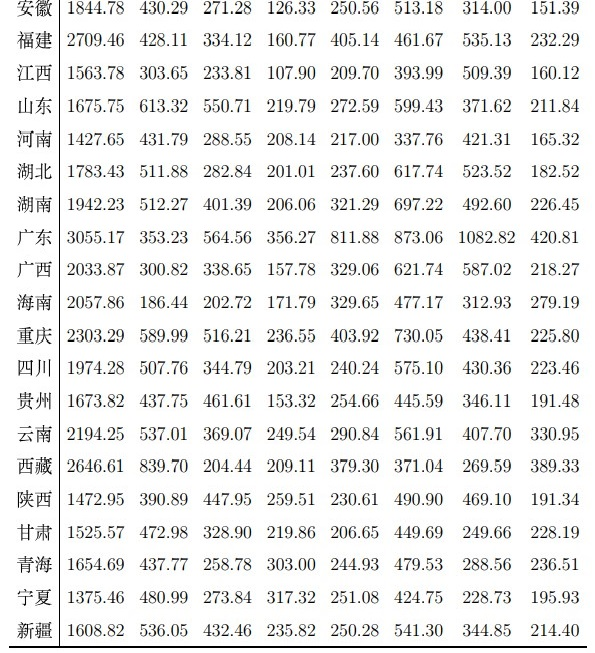

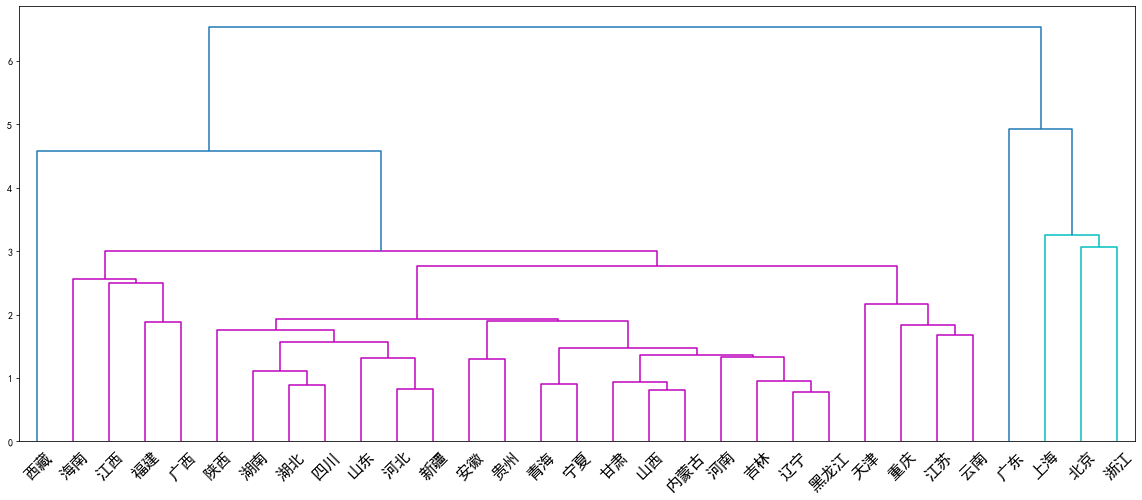

In [26]:
'''
通过8项指标对全国经济数据进行聚类分析。
可与R语言的聚类分析进行对比。
'''
import pandas as pd
import scipy.stats as st
x1 = np.array([2959.19, 2459.77, 1495.63, 1046.33, 1303.97, 1730.84, 
        1561.86, 1410.11, 3712.31, 2207.58, 2629.16, 1844.78, 
        2709.46, 1563.78, 1675.75, 1427.65, 1783.43, 1942.23, 
        3055.17, 2033.87, 2057.86, 2303.29, 1974.28, 1673.82, 
        2194.25, 2646.61, 1472.95, 1525.57, 1654.69, 1375.46, 
        1608.82])
x2 = np.array([730.79, 495.47, 515.90, 477.77, 524.29, 553.90, 492.42, 
        510.71, 550.74, 449.37, 557.32, 430.29, 428.11, 303.65, 
        613.32, 431.79, 511.88, 512.27, 353.23, 300.82, 186.44, 
        589.99, 507.76, 437.75, 537.01, 839.70, 390.89, 472.98, 
        437.77, 480.99, 536.05])
x3 = np.array([749.41, 697.33, 362.37, 290.15, 254.83, 246.91, 200.49, 
        211.88, 893.37, 572.40, 689.73, 271.28, 334.12, 233.81, 
        550.71, 288.55, 282.84, 401.39, 564.56, 338.65, 202.72, 
        516.21, 344.79, 461.61, 369.07, 204.44, 447.95, 328.90, 
        258.78, 273.84, 432.46])
x4 = np.array([513.34, 302.87, 285.32, 208.57, 192.17, 279.81, 218.36, 
        277.11, 346.93, 211.92, 435.69, 126.33, 160.77, 107.90, 
        219.79, 208.14, 201.01, 206.06, 356.27, 157.78, 171.79, 
        236.55, 203.21, 153.32, 249.54, 209.11, 259.51, 219.86, 
        303.00, 317.32, 235.82])
x5 = np.array([467.87, 284.19, 272.95, 201.50, 249.81, 239.18, 220.69, 
        224.65, 527.00, 302.09, 514.66, 250.56, 405.14, 209.70, 
        272.59, 217.00, 237.60, 321.29, 811.88, 329.06, 329.65, 
        403.92, 240.24, 254.66, 290.84, 379.30, 230.61, 206.65, 
        244.93, 251.08, 250.28])
x6 = np.array([1141.82, 735.97, 540.58, 414.72, 463.09, 445.20, 459.62, 
        376.82, 1034.98, 585.23, 795.87, 513.18, 461.67, 393.99, 
        599.43, 337.76, 617.74, 697.22, 873.06, 621.74, 477.17, 
        730.05, 575.10, 445.59, 561.91, 371.04, 490.90, 449.69, 
        479.53, 424.75, 541.30])
x7 = np.array([478.42, 570.84, 364.91, 281.84, 287.87, 330.24, 360.48, 
        317.61, 720.33, 429.77, 575.76, 314.00, 535.13, 509.39, 
        371.62, 421.31, 523.52, 492.60, 1082.82, 587.02, 312.93, 
        438.41, 430.36, 346.11, 407.70, 269.59, 469.10, 249.66, 
        288.56, 228.73, 344.85])
x8 = np.array([457.64, 305.08, 188.63, 212.10, 192.96, 163.86, 147.76, 
        152.85, 462.03, 252.54, 323.36, 151.39, 232.29, 160.12, 
        211.84, 165.32, 182.52, 226.45, 420.81, 218.27, 279.19, 
        225.80, 223.46, 191.48, 330.95, 389.33, 191.34, 228.19, 
        236.51, 195.93, 214.40])
names = np.array(["北京", "天津", "河北", "山西", "内蒙古", "辽宁", "吉林", 
                   "黑龙江", "上海", "江苏", "浙江", "安徽", "福建", "江西", 
                   "山东",  "河南", "湖北", "湖南", "广东", "广西", "海南", 
                   "重庆", "四川", "贵州", "云南", "西藏", "陕西", "甘肃", 
                   "青海", "宁夏", "新疆"])
X = pd.DataFrame(np.array([x1,x2,x3,x4,x5,x6,x7,x8]).T,
                 columns=['x1','x2','x3','x4','x5','x6','x7','x8'],
                 index = names)
X_std = (X - np.mean(X,axis=0))/st.tstd(X,axis=0)#注意这里要使用标准差的无偏估计
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(20,8))
Z = hierarchy.linkage(X_std, 'average')
###绘制系统树图
#dendrogram：系统树图
d1 = hierarchy.dendrogram(Z,labels = X_std.index,count_sort=False)
plt.xticks(size=16)
plt.show()

In [27]:
X

,x1,x2,x3,x4,x5,x6,x7,x8
北京,2959.19,730.79,749.41,513.34,467.87,1141.82,478.42,457.64
天津,2459.77,495.47,697.33,302.87,284.19,735.97,570.84,305.08
河北,1495.63,515.90,362.37,285.32,272.95,540.58,364.91,188.63
山西,1046.33,477.77,290.15,208.57,201.50,414.72,281.84,212.10
内蒙古,1303.97,524.29,254.83,192.17,249.81,463.09,287.87,192.96
辽宁,1730.84,553.90,246.91,279.81,239.18,445.20,330.24,163.86
吉林,1561.86,492.42,200.49,218.36,220.69,459.62,360.48,147.76
黑龙江,1410.11,510.71,211.88,277.11,224.65,376.82,317.61,152.85
上海,3712.31,550.74,893.37,346.93,527.00,1034.98,720.33,462.03
江苏,2207.58,449.37,572.40,211.92,302.09,585.23,429.77,252.54


### 6.2.3 Kmeans方法--动态聚类法
- #### 概念
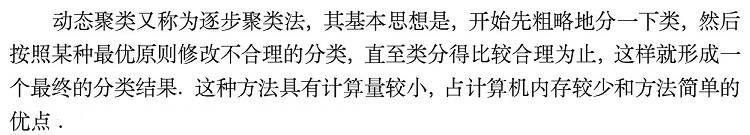

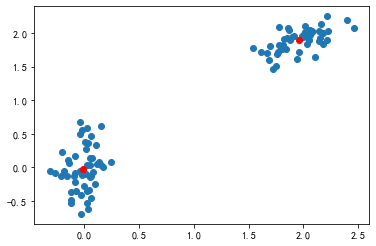

In [28]:
'''
kmeans算法，通过模拟生成数据进行聚类。
'''
from numpy import array
import numpy as np
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt
from numpy import random
pts=50
###[0, 0]均值，[[4, 1], [1, 4]]协方差
a = np.random.multivariate_normal([0, 0], [[4, 1], [1, 4]], size=pts)
b = np.random.multivariate_normal([30, 10],[[10, 2], [2, 1]],size=pts)
features = np.concatenate((a, b))

###whiten是归一化函数
whitened = whiten(features)
codebook, distortion = kmeans(whitened, 2)
###数据归一化后的散点图
plt.scatter(whitened[:, 0], whitened[:, 1])
###codebook是每个聚类的质心
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

In [29]:
codebook

array([[-0.01198181, -0.02785446],
       [ 1.9622149 ,  1.90174704]])

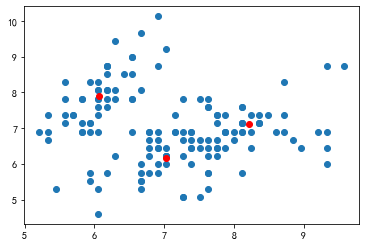

In [30]:
###使用iris鸢尾花数据进行聚类
#效果一般，可能是归一化处理不是特别理想
#但是大致上也可以看出3类鸢尾花的聚类轮廓
data=iris[:,0:4]
features = np.concatenate((a, b))
###whiten函数是一种数据规范化（归一化）方法
#具体做法：向量/向量标准差。
whitened = whiten(data)
codebook, distortion = kmeans(whitened, 3)
plt.scatter(whitened[:, 0], whitened[:, 1])
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

------------